# Restaurant data classification

In this project we will dive deep into restaurant data. We will develop a classification model to predict the type of review the user might leave from the given text. We will also draw wordclouds.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('restaurant.csv', encoding='latin-1')
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


## EDA

In [3]:
df[df.duplicated()]

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date


In [4]:
df.isnull().sum()

Unnamed: 0     0
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [5]:
df.shape

(10417, 10)

In [6]:
df.sample()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
688,2423636,PdHJnewkFxqlCDEzvk4RQg,ceC9qIoD6MDCmENjN11_mA,RESDUcs7fIiihp38-d6_6g,4,0,0,0,It's the Mercedes Benz (AMG edition) of buffet...,2014-06-13 16:52:24


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


We will remove useless columns. We do not need 'Unnamed: 0', 'review_id', 'user_id', 'business_id'.

In [8]:
df.drop(['Unnamed: 0', 'review_id', 'user_id', 'business_id'], axis=1, inplace=True)

In [9]:
df.sample()

,stars,useful,funny,cool,text,date
9686,3,4,2,2,After wanting to try the infamous Bacchanal bu...,2019-05-22 04:26:08


In [10]:
df['date'] = df['date'].astype('datetime64[ns]')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   stars   10417 non-null  int64         
 1   useful  10417 non-null  int64         
 2   funny   10417 non-null  int64         
 3   cool    10417 non-null  int64         
 4   text    10417 non-null  object        
 5   date    10417 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 488.4+ KB


In [12]:
df.head()

,stars,useful,funny,cool,text,date
0,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

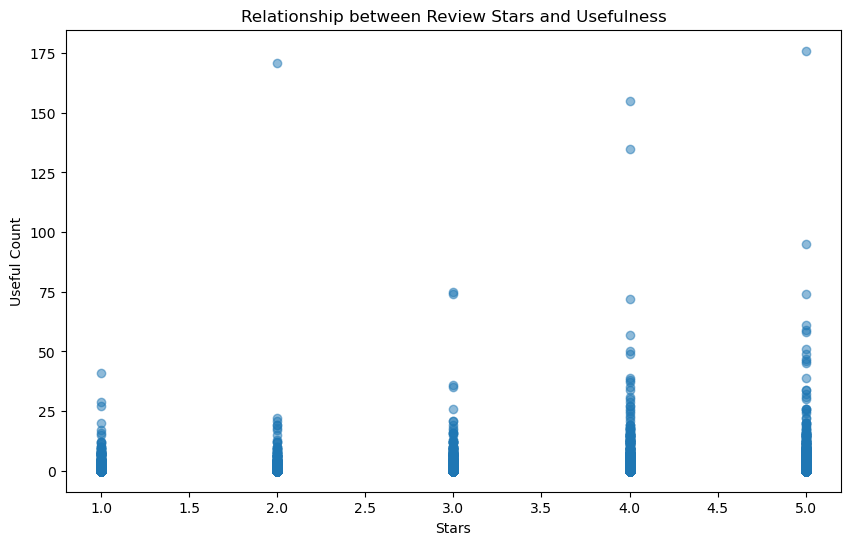

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df['stars'], df['useful'], alpha=0.5)
plt.title('Relationship between Review Stars and Usefulness')
plt.xlabel('Stars')
plt.ylabel('Useful Count')
plt.show()

We see that the reviews that left more stars are the ones that got marked 'useful' by more people.

## Analyzing the 'text' column.

In [15]:
df['text']

0        After getting food poisoning at the Palms hote...
1        "A feast worthy of Gods"\n\nBaccarnal Buffet i...
2        The crab legs are better than the ones at Wick...
3        Not worth it! Too salty food and expensive! Th...
4        I would give this infinite stars if I could. M...
                               ...                        
10412    Best buffet ever! Irma was great, served us be...
10413    Hollllllyyyy moleyyyy! \n\nThis buffet was one...
10414    The selection is amazing and all the food is e...
10415    One of the best buffets I've had in Vegas. My ...
10416    I got a chance to go to the Bacchanal Buffett ...
Name: text, Length: 10417, dtype: object

### We will remove non-english reviews.

In [16]:
from langdetect import detect
from textblob import TextBlob as TB

Show all non-english languages.

In [17]:
[detect(row) for row in df['text'] if detect(row) != 'en']

['sv',
 'de',
 'en',
 'fr',
 'sv',
 'pt',
 'sv',
 'fr',
 'fr',
 'sv',
 'da',
 'de',
 'es',
 'da',
 'da',
 'es',
 'da',
 'fr',
 'de',
 'de',
 'pt',
 'fr',
 'pt',
 'da',
 'sk',
 'en',
 'sv',
 'es',
 'es',
 'es',
 'sv',
 'sv',
 'es',
 'pt',
 'es',
 'pt',
 'es',
 'pt',
 'pt',
 'es',
 'es',
 'sv',
 'da',
 'fr',
 'pt',
 'pt',
 'da',
 'da']

In [18]:
df.drop(df[df['text'].apply(detect) != 'en'].index, axis=0, inplace=True)

In [19]:
[detect(row) for row in df['text'] if detect(row) != 'en']

[]

In [20]:
df['text'][0]

"After getting food poisoning at the Palms hotel, I was scared to eat at any more buffets. But we figured with the high price tag, the positive reviews etc, it was worth a chance. I'm really glad we gave it a try. (btw I uploaded a collage of the things we ate)\n\nThe seafood line is by the far the longest, i would not recommend showing up in heels if you're female, my feet were killing me between the line at the door, the line to get sat, and the seafood line. Totally worth it though.\n\nThe prime rib was the best Ive ever had.\n\nI loved the sweet potato tots.\n\nI even have PHO!\n\nThe music was great and so was our server Alma, ( he was a older gentleman with a mustache and was very attentive and delightful).\n\nI will return next trip in more comfortable shoes. After a horrible visit at the palms with non stop issues in a matter of 48 hours, your establishment was truly the high light of our trip. Thank you for an exquisite dinner."

In [21]:
df['text'][6]

"Came for dinner at $55 per person at around 5pm (practically no line at all). Great service overall but food quality was variable. Wasn't a big fan of the chinese or the mexican food, but the sushi was delicious along with the salads. Our favorite was a quinoa arugula pomegranate salad along with the small cups of mozzarella and tomato drizzled in balsamic. For Italian, you can make your own pasta (seemed limited to spaghetti and penne, but several different toppings) and a gnocchi that could use a bit more seasoning; awful chewy calamari, didn't try the charcuterie. The seafood buffet and beef buffet was decent. You can also have made to order ramen, pho, udon, etc. Udon was OK. My fiance demolished his crab legs and we enjoyed the prime rib and the lamb chops. The pork belly was overly salty - couldn't eat it. Large array of desserts - my favorites chocolate cake, green tea white chocolate covered strawberries, boba thai iced tea, chocolate mousse, fudge, and fruit."

In [22]:
df['text'][19]

"I would recommend this buffet to those with an expensive palate. It is usually 50 dollars but because it was memorial day weekend it cost 70. Was it worth it? Yes and no. They use premium ingredients. The seafood bar had lobster claws, the burgers were made from kobe beef and the crab legs are sliced in half which means NO FIGHTING WITH YOUR FOOD. When you take all that into consideration you can easily eat your money's worth. The buffets is separated by different regions Italy, Mexico, etc.  They had some amazing Mexican soup with tripe and some other odd bist of the animal but it was flavourful. They have an actual pho station, fresh sushi, gourmet meats balls. Whatever you want it is hear. I still wouldn't say it was the best buffet I've ever been to because there was nothing that really stood out to me that I craved after I left. I just loved the fact that they offered things a usual buffet wouldn't offer. You can tell that every station but effort and into their food and it was n

## NLP prep work on text column

### Starting an NLP project

- Convert all to lowecase
- Remove punctiation
- Remove numbers
- Remove newline characters
- Remove stopwords (unnecessary words)
- Tokenize
- use Lemma & Stemma to get the stem of the words
- Vectorize

In [23]:
df['text'] = df['text'].str.lower()

In [24]:
df['text'][0]

"after getting food poisoning at the palms hotel, i was scared to eat at any more buffets. but we figured with the high price tag, the positive reviews etc, it was worth a chance. i'm really glad we gave it a try. (btw i uploaded a collage of the things we ate)\n\nthe seafood line is by the far the longest, i would not recommend showing up in heels if you're female, my feet were killing me between the line at the door, the line to get sat, and the seafood line. totally worth it though.\n\nthe prime rib was the best ive ever had.\n\ni loved the sweet potato tots.\n\ni even have pho!\n\nthe music was great and so was our server alma, ( he was a older gentleman with a mustache and was very attentive and delightful).\n\ni will return next trip in more comfortable shoes. after a horrible visit at the palms with non stop issues in a matter of 48 hours, your establishment was truly the high light of our trip. thank you for an exquisite dinner."

In [25]:
df['text'] = df['text'].str.replace('\n', '')

In [26]:
df['text'][0]

"after getting food poisoning at the palms hotel, i was scared to eat at any more buffets. but we figured with the high price tag, the positive reviews etc, it was worth a chance. i'm really glad we gave it a try. (btw i uploaded a collage of the things we ate)the seafood line is by the far the longest, i would not recommend showing up in heels if you're female, my feet were killing me between the line at the door, the line to get sat, and the seafood line. totally worth it though.the prime rib was the best ive ever had.i loved the sweet potato tots.i even have pho!the music was great and so was our server alma, ( he was a older gentleman with a mustache and was very attentive and delightful).i will return next trip in more comfortable shoes. after a horrible visit at the palms with non stop issues in a matter of 48 hours, your establishment was truly the high light of our trip. thank you for an exquisite dinner."

In [27]:
df['text'] = df['text'].str.replace('[^\w\s]', '', regex=True)

In [28]:
df['text'][0]

'after getting food poisoning at the palms hotel i was scared to eat at any more buffets but we figured with the high price tag the positive reviews etc it was worth a chance im really glad we gave it a try btw i uploaded a collage of the things we atethe seafood line is by the far the longest i would not recommend showing up in heels if youre female my feet were killing me between the line at the door the line to get sat and the seafood line totally worth it thoughthe prime rib was the best ive ever hadi loved the sweet potato totsi even have phothe music was great and so was our server alma  he was a older gentleman with a mustache and was very attentive and delightfuli will return next trip in more comfortable shoes after a horrible visit at the palms with non stop issues in a matter of 48 hours your establishment was truly the high light of our trip thank you for an exquisite dinner'

In [29]:
df['text'] = df['text'].str.replace('\d+', '', regex=True)

In [30]:
df['text'][16]

'im a little torn between  and  stars but overall you are going to visit a good buffet if you come here a lot of the posts says you wait a long time when you come which is prolly true in a lot of cases and probably for dinner but i guess we got lucky we came at about  and got to the cashier at about  im not sure we could have timed it any better because  we got to pay breakfast price of  and still enjoy lunch foods and  we got to eat some breakfast foods too  off if you are a rewards card member free to join we were seated quickly but the waitress is kind of slow probably manning too many tables from what i could see ok now for the food this was probably the best quality buffet ive been to in vegas you might be able to say wicked spoon or rio have more options but they definitely dont taste as good they have different types of clam dishes fish crab claws didnt see crab legs ceviche bbq prime rib brisket sausage mexican food somewhat small selection three different kind of fries mashed 

In [31]:
df.head()

,stars,useful,funny,cool,text,date
0,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18
1,4,39,21,29,a feast worthy of godsbaccarnal buffet in caes...,2014-01-17 00:50:50
2,4,1,1,1,the crab legs are better than the ones at wick...,2015-06-08 18:03:09
3,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29
4,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28 07:13:17


### Spell check

In [32]:
# from autocorrect import Speller

In [33]:
# spell = Speller()

In [34]:
# df['text'] = [spell(s) for s in df['text']]

I wanted to correct spelling on all the columns, but that was taking a lot of time. I left the code there anyway.

In [35]:
# from textblob import TextBlob as tb

In [36]:
# blob = tb(df['text'][0])
# blob.correct().string

In [37]:
# df['text'] = [tb(s).correct().string for s in df['text']]

This too takes a lot of time.

### A column to categorize reviews

In [57]:
import seaborn as sns

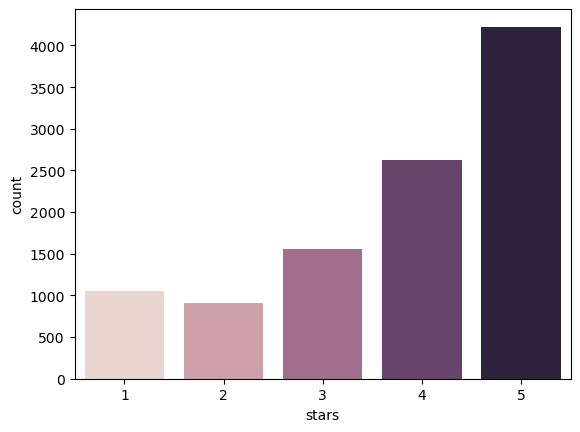

In [59]:
sns.countplot(x='stars', hue='stars', data=df, legend=False);

In [60]:
df['positive'] = [1 if stars >= 3 else 0 for stars in df['stars']]

In [61]:
df.head()

,stars,useful,funny,cool,text,date,polarity,subjectivity,positive
0,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18,0.337330,0.586926,1
1,4,39,21,29,a feast worthy of godsbaccarnal buffet in caes...,2014-01-17 00:50:50,0.219409,0.537292,1
2,4,1,1,1,the crab legs are better than the ones at wick...,2015-06-08 18:03:09,-0.134722,0.731944,1
3,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29,-0.325000,0.400000,0
4,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28 07:13:17,0.362500,0.725000,1


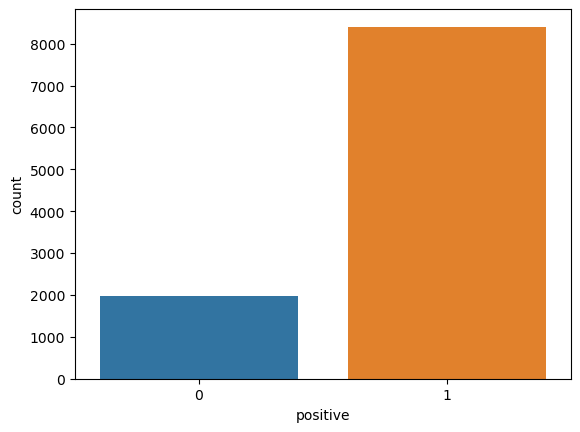

In [62]:
sns.countplot(x='positive', hue='positive', data=df, legend=False);

## Word Cloud

### Classify based on stars

In [38]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def wc(data, bgcolor='white', figsize=(10, 10)):
    plt.figure(figsize=figsize, facecolor='k')
    mask = np.array(Image.open('cloud.png'))
    wc = WordCloud(background_color=bgcolor, stopwords=STOPWORDS, mask=mask, collocations=False, contour_width=3, contour_color='cyan')
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

Word cloud for positive reviews 

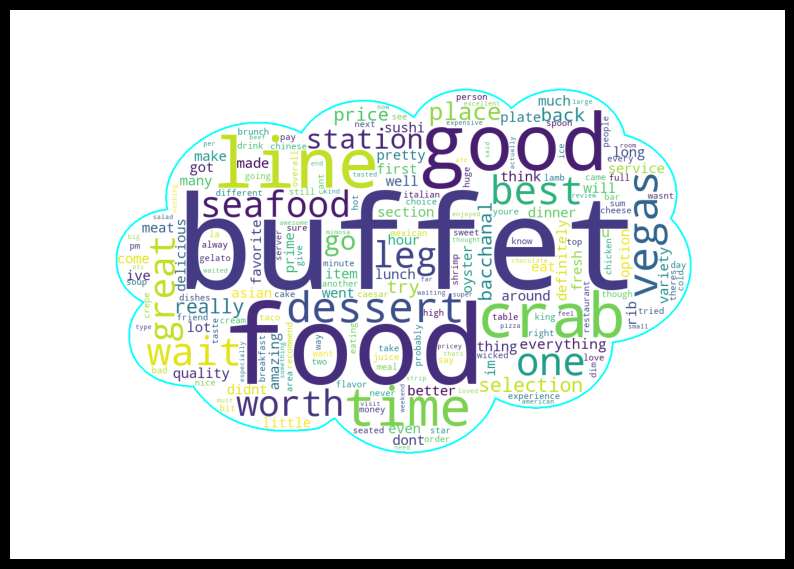

In [63]:
wc(df[df['positive'] == 1]['text'])

And for negative reviews

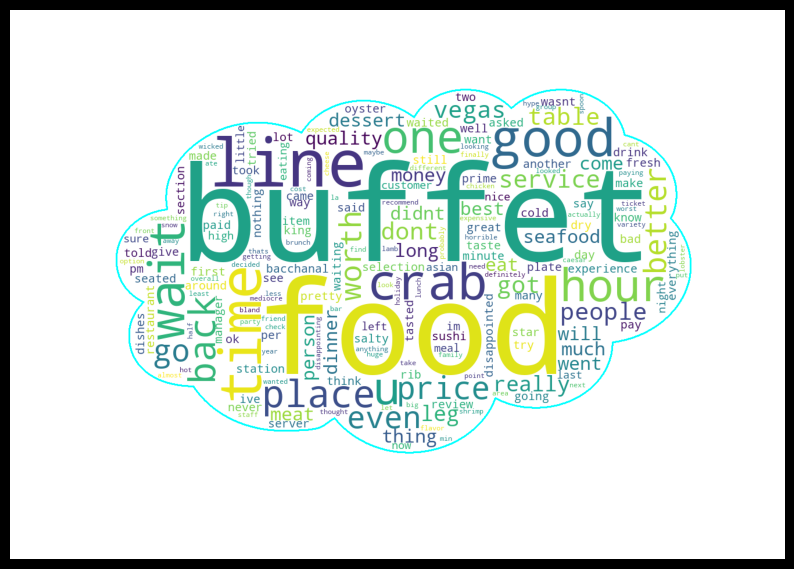

In [64]:
wc(df[df['positive'] == 0]['text'])

The absolute best and absolute worst reviews

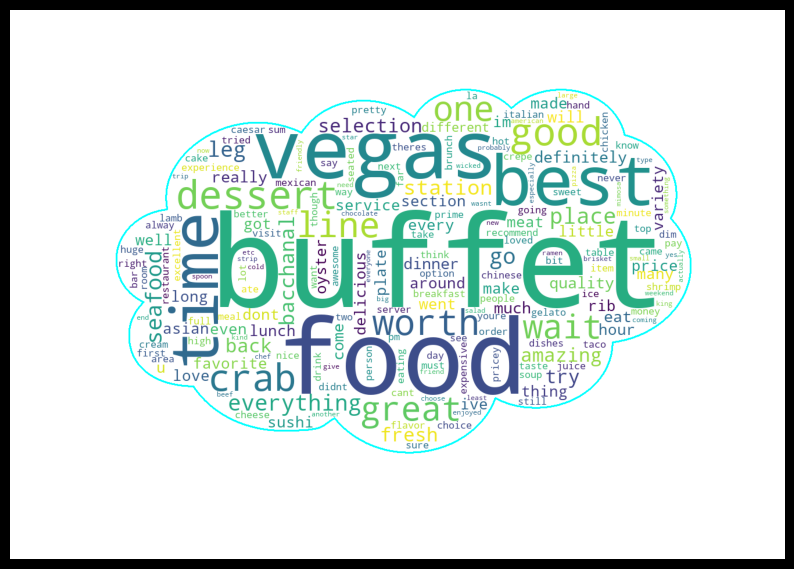

In [65]:
wc(df[df['stars'] == 5]['text'])

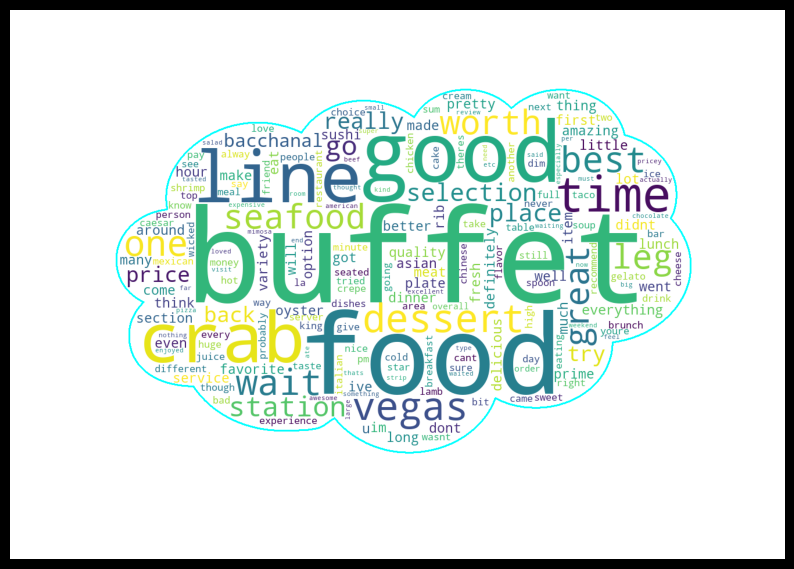

In [66]:
wc(df[df['positive'] == 1]['text'])

## Sentiment Analysis

In [45]:
TB(df['text'][0]).sentiment.polarity

0.3373304473304473

In [46]:
TB(df['text'][0]).subjectivity

0.5869264069264069

In [47]:
df['polarity'] = [TB(s).sentiment.polarity for s in df['text']]

In [48]:
df['subjectivity'] = [TB(s).sentiment.subjectivity for s in df['text']]

In [49]:
df.head()

,stars,useful,funny,cool,text,date,polarity,subjectivity
0,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18,0.337330,0.586926
1,4,39,21,29,a feast worthy of godsbaccarnal buffet in caes...,2014-01-17 00:50:50,0.219409,0.537292
2,4,1,1,1,the crab legs are better than the ones at wick...,2015-06-08 18:03:09,-0.134722,0.731944
3,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29,-0.325000,0.400000
4,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28 07:13:17,0.362500,0.725000


In [50]:
df.polarity.describe()

count    10370.000000
mean         0.226008
std          0.196796
min         -1.000000
25%          0.114104
50%          0.216667
75%          0.332484
max          1.000000
Name: polarity, dtype: float64

In [51]:
df.subjectivity.describe()

count    10370.000000
mean         0.531230
std          0.121008
min          0.000000
25%          0.460579
50%          0.529621
75%          0.600000
max          1.000000
Name: subjectivity, dtype: float64

### Wordcloud based on polarity.

In [79]:
good = df[df['polarity'] > 0]['text']
bad = df[df['polarity'] < 0]['text']

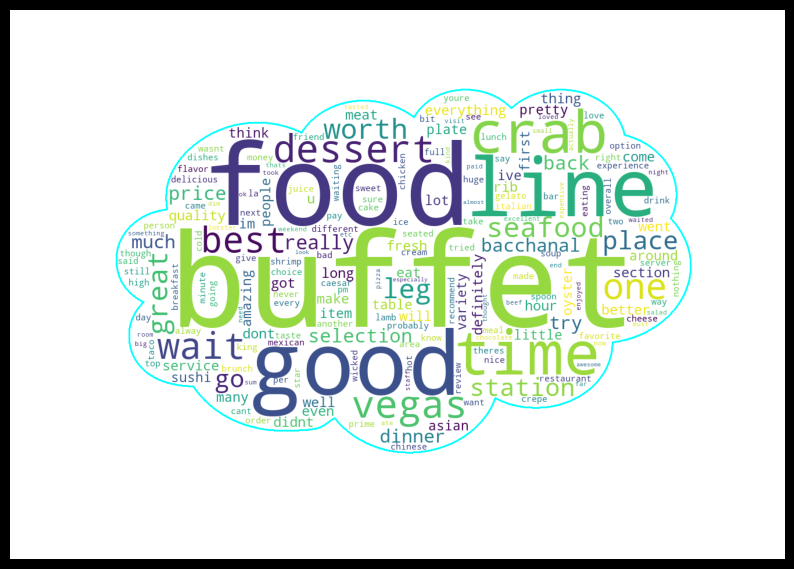

In [80]:
wc(good)

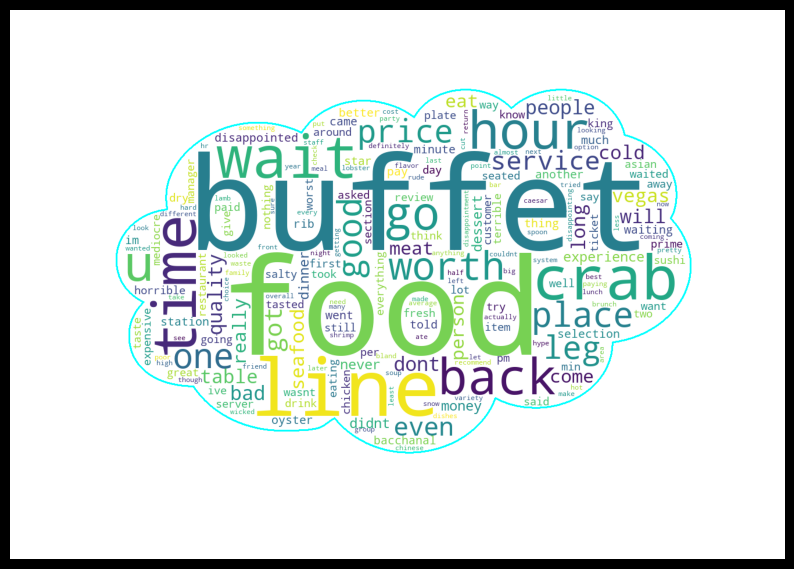

In [81]:
wc(bad)

## Modelling

We will predict the number of stars based on sentiment analysis.

In [100]:
x = df[['polarity', 'subjectivity']]
y = df[['positive']]

In [101]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split as tts

In [102]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=.2, random_state=42)

In [103]:
gbc = GradientBoostingClassifier()

In [104]:
model = gbc.fit(x_train, y_train)

/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [105]:
pred = model.predict(x_test)

In [106]:
accuracy_score(pred, y_test)

0.8505303760848602

### Using vectorized text

In [88]:
x = df['text']
y = df['positive']

In [89]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [90]:
from sklearn.feature_extraction.text import CountVectorizer as cv
from nltk.stem import PorterStemmer
from textblob import TextBlob

In [91]:
pr = PorterStemmer()

In [92]:
def lemmafn(text):
    words = TextBlob(text).words
    return [pr.stem(word) for word in words]

In [93]:
v = cv(stop_words='english', ngram_range=(1, 2), analyzer=lemmafn)

In [94]:
x = v.fit_transform(x)

/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.2)

In [96]:
mnb = MultinomialNB()

In [97]:
model = mnb.fit(x_train, y_train)

In [98]:
pred = model.predict(x_test)

In [99]:
accuracy_score(pred, y_test)

0.8828351012536162